Write a Python program that inputs a polynomial in standard algebraic
notation and outputs the first derivative of that polynomial.

In [ ]:
#C-2.33

import re


def FirstDerivative(poly):

#Given a polynominal, output its first 

    rslt = ""
    for sign, coef, expo in re.findall("([\+-]?)\s?(\d?)\*?x\*?\*?(\d?)", '+' + poly):
        coef = int(sign + coef)
        if expo == "":
            expo = "1"
        expo = int(expo)

        new_coef = coef * expo
        new_expo = expo - 1
        if new_coef > 0:
            rslt += "+"
        if new_expo == 0:
            rslt += "%d" % (new_coef)
        elif new_expo == 1:
            rslt += "%d*x" % (new_coef)
        else:
            rslt += "%d*x**%d" % (new_coef, new_expo)

    if rslt[0] == "+":
        rslt = rslt[1:]
    rslt = rslt.replace("+", " + ")
    rslt = rslt.replace("-", " - ")
    return rslt

s = "-3*x**4 + 8*x**2 - 3*x + 1"
print(FirstDerivative(s))

s = "3*x**5 + 2*x**3 - 3*x + 1"
print(FirstDerivative(s))


Write a Python program that inputs a document and then outputs a barchart plot of the frequencies of each alphabet character that appears in
that document


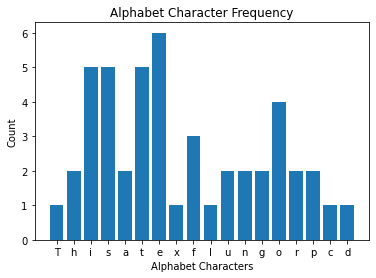

In [16]:
#C-2.34

import matplotlib.pyplot as plt

# Prompt user for filename
filename = input("Enter a filename: ")

# Open the file
file = open(filename, "r")

# Read the contents of the file
contents = file.read()

# Create a dictionary to store the character count
char_count = {}

# Iterate through each character in the file
for char in contents:
    # If character is an alphabetical character, add it to the dictionary (or increment the count)
    if char.isalpha():
        if char in char_count:
            char_count[char] += 1
        else:
            char_count[char] = 1

# Get the labels and values from the dictionary
labels = list(char_count.keys())
values = list(char_count.values())

# Plot the barchart
plt.bar(labels, values)
plt.xlabel('Alphabet Characters')
plt.ylabel('Count')
plt.title('Alphabet Character Frequency')
plt.show()


Write a set of Python classes that can simulate an Internet application in
which one party, Alice, is periodically creating a set of packets that she
wants to send to Bob. An Internet process is continually checking if Alice
has any packets to send, and if so, it delivers them to Bob’s computer, and
Bob is periodically checking if his computer has a packet from Alice, and,
if so, he reads and deletes it.

In [ ]:
#C-2.35

class Packet:
    def __init__(self, data):
        self.data = data


class Alice:
    def __init__(self):
        self.packets = []

    def create_packet(self, data):
        self.packets.append(Packet(data))

    def get_packet(self):
        if len(self.packets) > 0:
            return self.packets.pop()


class InternetProcess:
    def __init__(self, alice, bob):
        self.alice = alice
        self.bob = bob

    def deliver_packet(self):
        packet = self.alice.get_packet()
        if packet is not None:
            self.bob.receive_packet(packet)


class Bob:
    def __init__(self):
        self.packets = []

    def receive_packet(self, packet):
        self.packets.append(packet)

    def get_packet(self):
        if len(self.packets) > 0:
            return self.packets.pop()


alice = Alice()
bob = Bob()
internet_process = InternetProcess(alice, bob)

alice.create_packet("Hello Bob!")
internet_process.deliver_packet()
packet = bob.get_packet()
print(packet.data)  


Write a Python program to simulate an ecosystem containing two types
of creatures, bears and fish. The ecosystem consists of a river, which is
modeled as a relatively large list. Each element of the list should be a
Bear object, a Fish object, or None. In each time step, based on a random
process, each animal either attempts to move into an adjacent list location
or stay where it is. If two animals of the same type are about to collide in
the same cell, then they stay where they are, but they create a new instance
of that type of animal, which is placed in a random empty (i.e., previously
None) location in the list. If a bear and a fish collide, however, then the
fish dies (i.e., it disappears).

In [ ]:
#C-2.36

class River(object):
    def __init__(self, n_room=10, n_animal=8):
        self._n_room = n_room
        self._eco = []
        self._n_bear = np.random.randint(0, n_animal)
        self._n_fish = n_animal - self._n_bear
        for i in range(self._n_bear):
            self._eco.append("B")  # Bear
        for i in range(self._n_fish):
            self._eco.append("F")  # Fish
        for i in range(n_room - n_animal):
            self._eco.append("N")  # None
        np.random.shuffle(self._eco)

    def get_eco(self):
        print("Eco Status: ", self._eco)
        print("Number of Bears: ", self._n_bear)
        print("Number of Fishes: ", self._n_fish)

    def add_bear(self, n):
        if self._eco[n] == "B":
            print("Rejected: Already Occupied.")
        elif self._eco[n] == "N":
            self._eco[n] = "B"
            self._n_bear += 1
        else:
            print("Bear eats Fish!")
            self._eco[n] = "B"
            self._n_bear += 1
            self._n_fish -= 1

    def add_fish(self, n):
        if self._eco[n] == "F":
            print("Rejected: Already occupied by another fish.")
        elif self._eco[n] == "N":
            self._eco[n] = "F"
            self._n_fish += 1
        else:
            print("Rejected: Already occupied by a bear.")

    def kill(self, n):
        if self._eco[n] == "B":
            self._eco[n] == "N"
            self._n_bear -= 1
        elif self._eco[n] == "F":
            self._eco[n] == "N"
            self._n_fish -= 1
        else:
            print("Already Empty")


Write a simulator, as in the previous project, but add a Boolean gender
field and a floating-point strength field to each animal, using an Animal
class as a base class. If two animals of the same type try to collide, then
they only create a new instance of that type of animal if they are of different genders. Otherwise, if two animals of the same type and gender try to
collide, then only the one of larger strength survives.

In [ ]:
#C-2.37

import random


class Animal:
    def __init__(self, type, gender, strength):
        self.type = type
        self.gender = gender
        self.strength = strength


def simulate(animals):
    while len(animals) > 1:
        animal1 = random.choice(animals)
        animals.remove(animal1)
        animal2 = random.choice(animals)
        animals.remove(animal2)
        if animal1.type == animal2.type and animal1.gender != animal2.gender:
            if animal1.strength > animal2.strength:
                animals.append(
                    Animal(animal1.type, animal1.gender, animal1.strength))
            else:
                animals.append(
                    Animal(animal2.type, animal2.gender, animal2.strength))
    return animals[0] if len(animals) == 1 else None


animals = [Animal("dog", "male", 10), Animal(
    "cat", "female", 8), Animal("bird", "female", 5)]
winner = simulate(animals)
if winner:
    print("The winner is a %s %s with strength %s!" %
          (winner.type, winner.gender, winner.strength))
else:
    print("There is no winner!")


Write a Python program that simulates a system that supports the functions of an e-book reader. You should include methods for users of your
system to “buy” new books, view their list of purchased books, and read
their purchased books. Your system should use actual books, which have
expired copyrights and are available on the Internet, to populate your set
of available books for users of your system to “purchase” and read.

In [ ]:
#C-2.38

class BookReader:

  def __init__(self):
    self.books = []
    self.purchased_books = []

  def buy_book(self, book):
    """
    Adds a book to the list of purchased books
    """
    if book not in self.purchased_books:
      self.purchased_books.append(book)

  def list_purchased_books(self):
    """
    Prints the list of purchased books
    """
    print("Purchased books:")
    for book in self.purchased_books:
      print(book)

  def read_book(self, book):
    """
    Prints the contents of a book
    """
    if book in self.purchased_books:
      # open and read the book
      with open(book, 'r') as f:
        print(f.read())
    else:
      print(f"You have not purchased {book}")

  def get_book_list(self):
    """
    Gets the list of available books
    """
    # get a list of available books
    self.books = [f for f in os.listdir() if os.path.isfile(f)]
    print("Available books:")
    for book in self.books:
      print(book)


if __name__ == "__main__":

  book_reader = BookReader()
  book_reader.get_book_list()

  while True:
    # get user input
    choice = input(
        "Do you want to buy a book, list purchased books, read a book or quit? (buy/list/read/quit): ")

    if choice == "buy":
      book = input("Which book do you want to buy? ")
      book_reader.buy_book(book)
    elif choice == "list":
      book_reader.list_purchased_books()
    elif choice == "read":
      book = input("Which book do you want to read? ")
      book_reader.read_book(book)
    elif choice == "quit":
      break
    else:
      print("Invalid choice")

Develop an inheritance hierarchy based upon a Polygon class that has
abstract methods area( ) and perimeter( ). Implement classes Triangle,
Quadrilateral, Pentagon, Hexagon, and Octagon that extend this base
class, with the obvious meanings for the area( ) and perimeter( ) methods.
Also implement classes, IsoscelesTriangle, EquilateralTriangle, Rectangle, and Square, that have the appropriate inheritance relationships. Finally, write a simple program that allows users to create polygons of the
various types and input their geometric dimensions, and the program then
outputs their area and perimeter. For extra effort, allow users to input
polygons by specifying their vertex coordinates and be able to test if two
such polygons are similar.

In [ ]:
#C-2.39

class Polygon:
    def __init__(self):
        self.num_sides = 0

    def area(self):
        pass

    def perimeter(self):
        pass


class Triangle(Polygon):
    def __init__(self, side1, side2, side3):
        Polygon.__init__(self)
        self.num_sides = 3
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3

    def area(self):
        # Heron's Formula
        s = (self.side1 + self.side2 + self.side3) / 2
        return (s*(s-self.side1)*(s-self.side2)*(s-self.side3)) ** 0.5

    def perimeter(self):
        return self.side1 + self.side2 + self.side3


class IsoscelesTriangle(Triangle):
    def __init__(self, side1, side2):
        Triangle.__init__(self, side1, side2, side2)


class EquilateralTriangle(Triangle):
    def __init__(self, side):
        Triangle.__init__(self, side, side, side)


class Quadrilateral(Polygon):
    def __init__(self, side1, side2, side3, side4):
        Polygon.__init__(self)
        self.num_sides = 4
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3
        self.side4 = side4

    def area(self):
        pass

    def perimeter(self):
        return self.side1 + self.side2 + self.side3 + self.side4


class Rectangle(Quadrilateral):
    def __init__(self, length, width):
        Quadrilateral.__init__(self, length, width, length, width)

    def area(self):
        return self.side1 * self.side2


class Square(Rectangle):
    def __init__(self, side):
        Rectangle.__init__(self, side, side)


class Pentagon(Polygon):
    def __init__(self, side1, side2, side3, side4, side5):
        Polygon.__init__(self)
        self.num_sides = 5
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3
        self.side4 = side4
        self.side5 = side5

    def area(self):
        pass

    def perimeter(self):
        return self.side1 + self.side2 + self.side3 + self.side4 + self.side5


class Hexagon(Polygon):
    def __init__(self, side1, side2, side3, side4, side5, side6):
        Polygon.__init__(self)
        self.num_sides = 6
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3
        self.side4 = side4
        self.side5 = side5
        self.side6 = side6

    def area(self):
        pass

    def perimeter(self):
        return self.side1 + self.side2 + self.side3 + self.side4 + self.side5 + self.side6


class Octagon(Polygon):
    def __init__(self, side1, side2, side3, side4, side5, side6, side7, side8):
        Polygon.__init__(self)
        self.num_sides = 8
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3
        self.side4 = side4
        self.side5 = side5
        self.side6 = side6
        self.side7 = side7
        self.side8 = side8

    def area(self):
        pass

    def perimeter(self):
        return self.side1 + self.side2 + self.side3 + self.side4 + self.side5 + self.side6 + self.side7 + self.side8

# Program to allow users to create polygons of the various types and input their geometric dimensions, and the program then outputs their area and perimeter.


print("Choose the type of polygon you would like to create:")
print("1. Triangle")
print("2. Quadrilateral")
print("3. Pentagon")
print("4. Hexagon")
print("5. Octagon")

choice = int(input("Enter your choice (1-5): "))

if choice == 1:
    side1 = float(input("Enter the length of the first side: "))
    side2 = float(input("Enter the length of the second side: "))
    side3 = float(input("Enter the length of the third side: "))
    tri = Triangle(side1, side2, side3)
    print("The area of the triangle is", tri.area())
    print("The perimeter of the triangle is", tri.perimeter())

elif choice == 2:
    side1 = float(input("Enter the length of the first side: "))
    side2 = float(input("Enter the length of the second side: "))
    side3 = float(input("Enter the length of the third side: "))
    side4 = float(input("Enter the length of the fourth side: "))
    quad = Quadrilateral(side1, side2, side3, side4)
    print("The area of the quadrilateral is", quad.area())
    print("The perimeter of the quadrilateral is", quad.perimeter())

elif choice == 3:
    side1 = float(input("Enter the length of the first side: "))
    side2 = float(input("Enter the length of the second side: "))
    side3 = float(input("Enter the length of the third side: "))
    side4 = float(input("Enter the length of the fourth side: "))
    side5 = float(input("Enter the length of the fifth side: "))
    pent = Pentagon(side1, side2, side3, side4, side5)
    print("The area of the pentagon is", pent.area())
    print("The perimeter of the pentagon is", pent.perimeter())

elif choice == 4:
    side1 = float(input("Enter the length of the first side: "))
    side2 = float(input("Enter the length of the second side: "))
    side3 = float(input("Enter the length of the third side: "))
    side4 = float(input("Enter the length of the fourth side: "))
    side5 = float(input("Enter the length of the fifth side: "))
    side6 = float(input("Enter the length of the sixth side: "))
    hex = Hexagon(side1, side2, side3, side4, side5, side6)
    print("The area of the hexagon is", hex.area())
    print("The perimeter of the hexagon is", hex.perimeter())

elif choice == 5:
    side1 = float(input("Enter the length of the first side: "))
    side2 = float(input("Enter the length of the second side: "))
    side3 = float(input("Enter the length of the third side: "))
    side4 = float(input("Enter the length of the fourth side: "))
    side5 = float(input("Enter the length of the fifth side: "))
    side6 = float(input("Enter the length of the sixth side: "))
    side7 = float(input("Enter the length of the seventh side: "))
    side8 = float(input("Enter the length of the eighth side: "))
    oct = Octagon(side1, side2, side3, side4, side5, side6, side7, side8)
    print("The area of the octagon is", oct.area())
    print("The perimeter of the octagon is", oct.perimeter())
